In [50]:
#Step 1: Create a Spotify Developer Account

In [51]:
#Step 2: Initial configuration

%pip install spotipy python-dotenv pandas matplotlib seaborn

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.1.2 -> 25.0.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [52]:
#Step 3: Environment variables

import os
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
from dotenv import load_dotenv
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

load_dotenv()

client_id = os.getenv("CLIENT_ID")
client_secret = os.getenv("CLIENT_SECRET")

In [53]:
#Step 4: Initialize Spotipy library

sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id=client_id, client_secret=client_secret))

In [54]:
#Step 5: Make API requests

def get_artist_id(artist_name):
    results = sp.search(q=artist_name, type="artist", limit=1)
    artists = results["artists"]["items"]

    if artists:
        artist_id = artists[0]["id"]
        print(f"Artist: {artists[0]['name']} | ID: {artist_id}")
        return artist_id
    else:
        print("Artist not found.")
        return None
    
artist_name = "Michael Jackson"
artist_id = get_artist_id(artist_name)

Artist: Michael Jackson | ID: 3fMbdgg4jU18AjLCKBhRSm


In [55]:
def get_top_tracks(artist_id):
    results = sp.artist_top_tracks(artist_id)
    
    tracks_data = []
    for track in results["tracks"][:10]:
        tracks_data.append({
            "name": track["name"],
            "popularity": track["popularity"],
            "duration_min": track["duration_ms"] / 60000
        })
    return tracks_data

if artist_id:
    top_tracks = get_top_tracks(artist_id)

    for i, track in enumerate(top_tracks, start=1):
        print(f"{i}. {track['name']} - Popularity: {track['popularity']}, Duration: {track['duration_min']:.2f} min")

1. Billie Jean - Popularity: 81, Duration: 4.90 min
2. Beat It - Popularity: 79, Duration: 4.31 min
3. Smooth Criminal - 2012 Remaster - Popularity: 75, Duration: 4.30 min
4. Rock with You - Single Version - Popularity: 78, Duration: 3.68 min
5. Chicago - Popularity: 78, Duration: 4.09 min
6. The Way You Make Me Feel - 2012 Remaster - Popularity: 73, Duration: 4.97 min
7. Don't Stop 'Til You Get Enough - Popularity: 76, Duration: 6.09 min
8. Thriller - Popularity: 72, Duration: 5.96 min
9. P.Y.T. (Pretty Young Thing) - Popularity: 73, Duration: 3.98 min
10. Remember the Time - Popularity: 74, Duration: 3.99 min


In [56]:
#Step 6: Transform to Pandas DataFrame

if artist_id:
    top_tracks = get_top_tracks(artist_id)

    df = pd.DataFrame(top_tracks)

    df_sorted = df.sort_values(by="popularity", ascending=False)

    print("\nTop 10 Songs of Michael Jackson:")
    print(df_sorted)


Top 10 Songs of Michael Jackson:
                                       name  popularity  duration_min
0                               Billie Jean          81      4.903767
1                                   Beat It          79      4.306650
3            Rock with You - Single Version          78      3.677100
4                                   Chicago          78      4.091767
6            Don't Stop 'Til You Get Enough          76      6.091100
2           Smooth Criminal - 2012 Remaster          75      4.296000
9                         Remember the Time          74      3.987100
5  The Way You Make Me Feel - 2012 Remaster          73      4.968667
8               P.Y.T. (Pretty Young Thing)          73      3.983767
7                                  Thriller          72      5.963333


In [57]:
print("\nTop 3 Songs by Popularity of Michael Jackson:")
print(df_sorted.head(3))


Top 3 Songs by Popularity of Michael Jackson:
                             name  popularity  duration_min
0                     Billie Jean          81      4.903767
1                         Beat It          79      4.306650
3  Rock with You - Single Version          78      3.677100


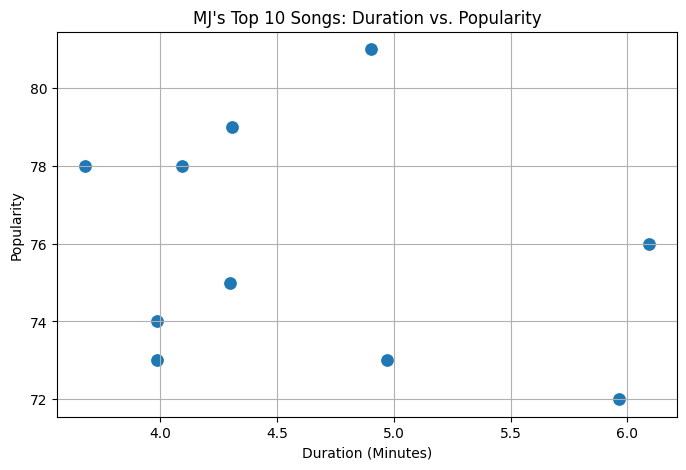

In [58]:
#Step 7: Analyze statistical relationship

def plot_popularity_vs_duration(df):
    plt.figure(figsize=(8, 5))
    sns.scatterplot(data=df, x="duration_min", y="popularity", s=100)
    
    plt.xlabel("Duration (Minutes)")
    plt.ylabel("Popularity")
    plt.title("MJ's Top 10 Songs: Duration vs. Popularity")
    plt.grid(True)
    plt.show()

if df is not None:
    plot_popularity_vs_duration(df)

The scatter plot does not show that there is a relationship between the duration of a song and its popularity for the top 10 Michael Jackson songs. So we cannot say that a song that lasts a short time may be more popular than a song that lasts longer. I believe that the popularity of a song especially in MJ's time was influenced by how many times a song was played on a radio or what was a more popular topic in differenct decades.